# Feature Extraction

In [1]:
#import libreries 

import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import mean_absolute_error

#import apply_preprocessing as apply_pp
#import normalDistribution as n_dist

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Goal

L’obiettivo nostro principale è quello di creare, estrarre, generare nuove feature, a partire da quelle presenti già nel dataset, con il fine di vedere l’impatto che queste nuove feature hanno nella bontà del modello allenato.

Il modello in sé per questo compito non è fondamentale: puoi usarne uno a tuo piacere.

Puoi cominciare a lavorarci da solo, provando a:

- Importare il dataset
- Capire bene il dataset, i.e., quali colonne/dati abbiamo come informazione
- Quale è la variabile target
- Quali feature possono essere generate o estratte a partire da quelle già presenti nel dataset
- Quali feature potrebbero essere utili da calcolare per migliorare la bontà del nostro modello

[Dataset description](https://www.kaggle.com/datasets/muthuj7/weather-dataset)

In [2]:
#import dataset 

Data = pd.read_csv("Dataset/weatherHistory.csv")

In [3]:
Data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Dataset Exploration and Analisis 

In [4]:
#Shape

print("Dataset shape:", Data.shape)

Dataset shape: (96453, 12)


In [5]:
#Dataset colunms

print("Dataset columns:\n\n", Data.columns)

Dataset columns:

 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


<AxesSubplot:>

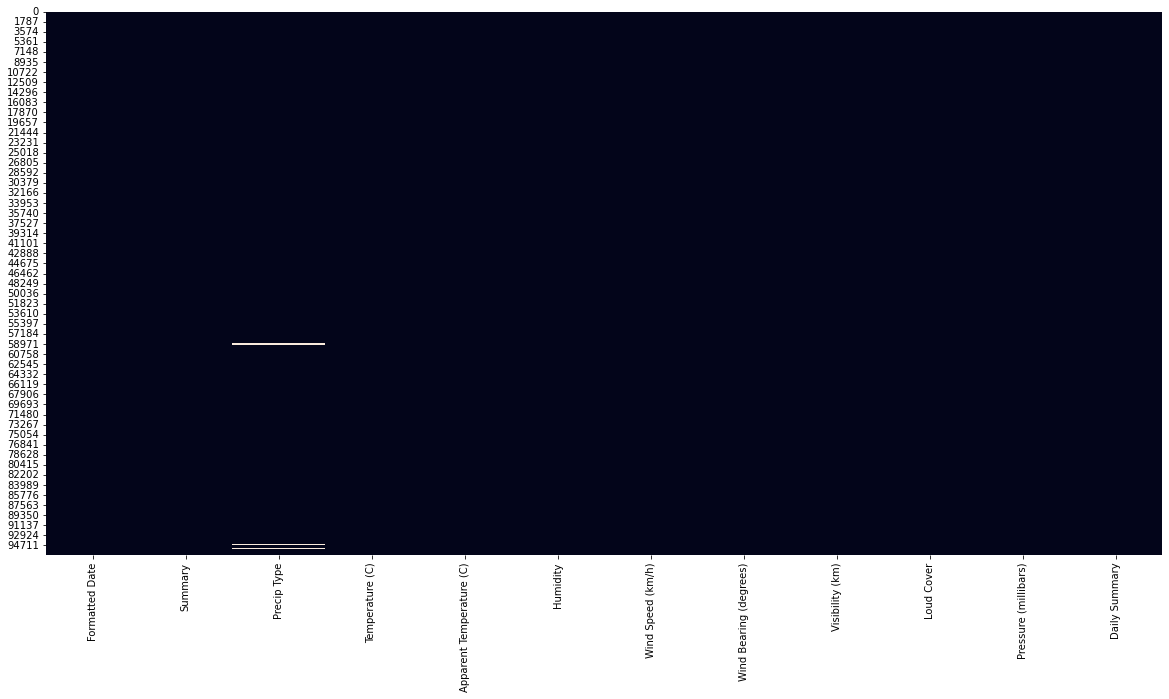

In [6]:
#NA values analisis 

plt.figure(figsize=(20,10))
sns.heatmap(Data.isna(), cbar=False)

In [7]:
#NA sorted by values count 

(Data.isna().sum()).sort_values(ascending=False)

Precip Type                 517
Formatted Date                0
Summary                       0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
#Replace Na with mode 

Data['Precip Type'] = Data['Precip Type'].fillna(Data['Precip Type'].mode()[0])

In [9]:
#Verify NA sorted by values count 

(Data.isna().sum()).sort_values(ascending=False)

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [10]:
#Values count 

Data.dtypes.value_counts()

float64    8
object     4
dtype: int64

In [11]:
#Convert in DataFrame 
Data = pd.DataFrame(Data)

In [12]:
#Uniques values 

Data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [13]:
Data['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [14]:
##Seprare Features and target 

In [15]:
X = Data.iloc[: , :-1] #Features 
y = Data.iloc[ :, -1:] #Target

In [16]:
y.head()

,Daily Summary
0,Partly cloudy throughout the day.
1,Partly cloudy throughout the day.
2,Partly cloudy throughout the day.
3,Partly cloudy throughout the day.
4,Partly cloudy throughout the day.


### Seprare Dataset into rain and not rain datas

In [17]:
#Mode 

X['Precip Type'].mode()

0    rain
Name: Precip Type, dtype: object

In [18]:
#Rain Data

rain = X[X['Precip Type']=='rain']
rain.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [19]:
rain.sort_values(by='Humidity', ascending=True).head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
29627,2009-01-25 11:00:00.000 +0100,Foggy,rain,1.111111,-3.95,0.0,20.93,350.0,0.161,0.0,1000.1


In [20]:
rain.sort_values(by='Humidity', ascending=True).tail(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
62550,2013-08-26 06:00:00.000 +0200,Partly Cloudy,rain,17.461111,17.461111,1.0,1.61,100.0,7.6958,0.0,1011.22


### Determine the range ( min - max ) values of rain and not rain datas 

In [21]:
rain.min() # min values 

Formatted Date              2006-01-01 00:00:00.000 +0100
Summary                                            Breezy
Precip Type                                          rain
Temperature (C)                                  0.005556
Apparent Temperature (C)                            -7.55
Humidity                                              0.0
Wind Speed (km/h)                                     0.0
Wind Bearing (degrees)                                0.0
Visibility (km)                                       0.0
Loud Cover                                            0.0
Pressure (millibars)                                  0.0
dtype: object

In [22]:
rain.max() #Max values 

Formatted Date              2016-12-31 20:00:00.000 +0100
Summary                           Windy and Partly Cloudy
Precip Type                                          rain
Temperature (C)                                 39.905556
Apparent Temperature (C)                        39.344444
Humidity                                              1.0
Wind Speed (km/h)                                 63.8526
Wind Bearing (degrees)                              359.0
Visibility (km)                                      16.1
Loud Cover                                            0.0
Pressure (millibars)                              1042.38
dtype: object

In [23]:
#Not rain 

not_rain = Data[Data['Precip Type']!='rain']
not_rain.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1562,2006-12-13 02:00:00.000 +0100,Foggy,snow,-0.483333,-4.150000,1.00,11.0929,219.0,0.483,0.0,1031.56,Foggy throughout the day.
1563,2006-12-13 03:00:00.000 +0100,Foggy,snow,-0.483333,-4.061111,0.96,10.7387,200.0,0.322,0.0,1031.47,Foggy throughout the day.
1564,2006-12-13 04:00:00.000 +0100,Foggy,snow,-0.922222,-3.477778,1.00,7.0679,206.0,0.161,0.0,1031.23,Foggy throughout the day.
1565,2006-12-13 05:00:00.000 +0100,Foggy,snow,-1.038889,-4.400000,1.00,9.4990,199.0,0.161,0.0,1031.41,Foggy throughout the day.
1566,2006-12-13 06:00:00.000 +0100,Foggy,snow,-1.088889,-4.438889,1.00,9.4346,219.0,0.322,0.0,1031.98,Foggy throughout the day.


In [24]:
not_rain.sort_values(by='Temperature (C)', ascending=True).head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
54847,2012-02-10 07:00:00.000 +0100,Foggy,snow,-21.822222,-21.822222,0.8,3.0751,323.0,1.3685,0.0,1033.66,Foggy starting in the morning continuing until...


In [25]:
not_rain.sort_values(by='Temperature (C)', ascending=True).tail(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
31734,2009-03-21 06:00:00.000 +0100,Partly Cloudy,snow,0.0,-5.783333,0.82,24.15,30.0,9.982,0.0,1022.6,Partly cloudy starting in the morning continui...


In [26]:
not_rain.min()

Formatted Date                          2006-01-07 19:00:00.000 +0100
Summary                                                        Breezy
Precip Type                                                      snow
Temperature (C)                                            -21.822222
Apparent Temperature (C)                                   -27.716667
Humidity                                                          0.0
Wind Speed (km/h)                                                 0.0
Wind Bearing (degrees)                                            0.0
Visibility (km)                                                   0.0
Loud Cover                                                        0.0
Pressure (millibars)                                              0.0
Daily Summary               Breezy and foggy starting in the evening.
dtype: object

In [27]:
not_rain.max()

Formatted Date              2016-12-31 23:00:00.000 +0100
Summary                                Windy and Overcast
Precip Type                                          snow
Temperature (C)                                       0.0
Apparent Temperature (C)                              0.0
Humidity                                              1.0
Wind Speed (km/h)                                 44.8868
Wind Bearing (degrees)                              359.0
Visibility (km)                                      16.1
Loud Cover                                            0.0
Pressure (millibars)                              1046.38
Daily Summary                  Partly cloudy until night.
dtype: object

## ---------------------------------------

In [28]:
#Seprare numerical and categoricals datas

Data_numerical = X.select_dtypes(include=[np.number])
Data_categorical = X.select_dtypes(exclude=[np.number])

In [29]:
Data_categorical = pd.DataFrame(Data_categorical)
Data_numerical = pd.DataFrame(Data_numerical )

In [30]:
Data_numerical_col = Data_numerical.columns

In [31]:
Data_numerical.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [32]:
Data_categorical.head()

,Formatted Date,Summary,Precip Type
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain


# Pre-Processing

In [33]:
#Handle datetime 

Data_categorical['Formatted Date'] = pd.to_datetime(Data_categorical['Formatted Date'], utc=True)

Data_categorical['Year']  =  Data_categorical['Formatted Date'].dt.year
Data_categorical['month']  =  Data_categorical['Formatted Date'].dt.month
Data_categorical['day']  =  Data_categorical['Formatted Date'].dt.day
Data_categorical['time']  =  Data_categorical['Formatted Date'].dt.time   
# TBD:  Extract more informations from date ... 

#Drop datetime 
Data_categorical = Data_categorical.drop('Formatted Date', axis=1)
Data_categorical.head()

,Summary,Precip Type,Year,month,day,time
0,Partly Cloudy,rain,2006,3,31,22:00:00
1,Partly Cloudy,rain,2006,3,31,23:00:00
2,Mostly Cloudy,rain,2006,4,1,00:00:00
3,Partly Cloudy,rain,2006,4,1,01:00:00
4,Mostly Cloudy,rain,2006,4,1,02:00:00


In [34]:
#PowerTransformer on numerical variables 
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , PowerTransformer , LabelEncoder

power = PowerTransformer()
power.fit(Data_numerical)
Data_numerical = power.transform(Data_numerical)

In [35]:
Data_categorical_col = Data_categorical.columns

In [36]:
Data_categorical = pd.DataFrame(Data_categorical, columns=Data_categorical_col)
Data_numerical = pd.DataFrame(Data_numerical , columns=Data_numerical_col)

In [37]:
 #OneHotEncoder on categoricals  variables 
encoder = OneHotEncoder(sparse=False, drop=None)
encoder.fit(Data_categorical)
Data_categorical =encoder.transform(Data_categorical)

In [38]:
Data_categorical

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [39]:
Data_categorical = pd.DataFrame(Data_categorical , columns=encoder.get_feature_names_out()
                               )
Data_numerical = pd.DataFrame(Data_numerical , columns=Data_numerical_col
                             )

In [40]:
#Merge Datas

pp_X = pd.merge(left=Data_numerical, right=Data_categorical, how='inner',left_index=True, right_index=True)

In [41]:
pp_X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
0,-0.216637,-0.289843,0.807083,0.624759,0.617617,1.386719,0.0,-0.014955,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.228690,-0.304733,0.594132,0.642519,0.682180,1.386719,0.0,0.015672,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.226393,-0.106927,0.807083,-1.080212,0.227640,1.146856,0.0,0.034716,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.339345,-0.423787,0.391791,0.622779,0.762219,1.386719,0.0,0.063670,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.290829,-0.327862,0.391791,0.219433,0.682180,1.386719,0.0,0.069843,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Data spliting 
train, test = train_test_split(pp_X, shuffle=True, test_size=0.2, random_state=50)
test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

In [43]:
train.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
14591,-0.392097,-0.333520,-0.210723,-0.609810,-0.103595,1.107229,0.0,0.372654,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72055,-0.912375,-1.050465,-0.098691,0.572843,1.060172,1.208698,0.0,0.390566,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30369,1.059340,1.047742,-0.666440,1.036839,1.083307,-0.150505,0.0,-0.077705,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63715,-0.684975,-0.774586,1.108169,0.398462,-1.891043,0.110857,0.0,-0.077098,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75868,-0.455565,-0.528111,0.594132,0.419788,-2.026955,-0.150505,0.0,-0.436499,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Extraction 

Documentation links : 

- [Documentation sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)

- [API sklearn](https://scikit-learn.org/stable/modules/classes.html)

- [Plot feature selection](https://github.com/scikit-learn/scikit-learn/blob/main/examples/feature_selection/plot_feature_selection.py)

- [French details](https://youtu.be/T4nZDuakYlU)

- [how to choose feature selection method](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)

In [44]:
y_col = y.columns

In [45]:
y = pd.DataFrame(y,columns=y.columns)
y.head()

,Daily Summary
0,Partly cloudy throughout the day.
1,Partly cloudy throughout the day.
2,Partly cloudy throughout the day.
3,Partly cloudy throughout the day.
4,Partly cloudy throughout the day.


In [46]:
 #Transofrmer on target  variables 
 #OneHotEncoder on categoricals  variables 

encoder_y = LabelEncoder()
encoder_y.fit(y)
y =encoder_y.transform(y)

In [47]:
y = pd.DataFrame(y,columns=y_col)
y.head()

,Daily Summary
0,197
1,197
2,197
3,197
4,197


In [48]:
#SelectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [49]:

X =train #Features 
y.reset_index(drop=True, inplace=True)
y.head()

,Daily Summary
0,197
1,197
2,197
3,197
4,197


In [50]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mode')
selector.fit(X, y)
selector.estimator_.coef_

ValueError: Found input variables with inconsistent numbers of samples: [77162, 96453]

In [ ]:
np.array(X.feature_names)[selector.get_support()]